In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the numerical variables of the Student Dataset
data = pd.read_csv('../student_performance_updated_1000.csv', usecols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade'])
data.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,FinalGrade
0,85.0,15.0,78.0,80.0
1,90.0,20.0,85.0,87.0
2,78.0,10.0,65.0,68.0
3,92.0,25.0,90.0,92.0
4,NaN,18.0,82.0,85.0


### Top-coding important

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap the values in the test set.

In [4]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.FinalGrade,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((700, 4), (300, 4))

## Outliers in continuous variables

* We can see that `StudyHoursPerWeek` and `PreviousGrade` are continuous variables. So, first I will cap the outliers in those variables.

Text(0, 0.5, 'PreviousGrade')

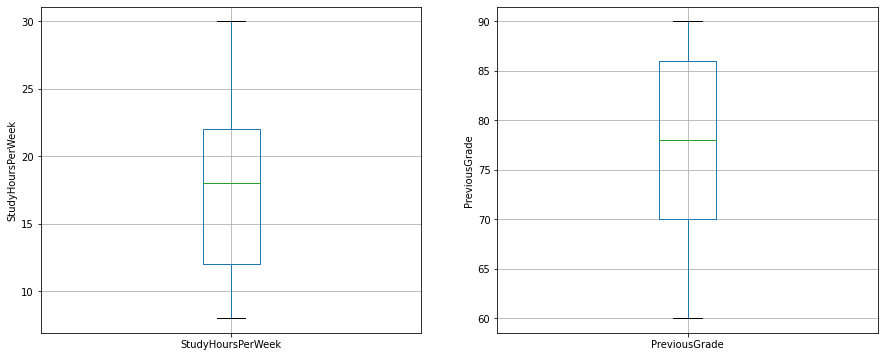

In [5]:
# let's make boxplots to visualise outliers in the continuous variables 
# StudyHoursPerWeek and PreviousGrade

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='StudyHoursPerWeek')
fig.set_title('')
fig.set_ylabel('StudyHoursPerWeek')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='PreviousGrade')
fig.set_title('')
fig.set_ylabel('PreviousGrade')

* Both StudyHoursPerWeek and PreviousGrade contain outliers. Let's find which valuers are the outliers.

Text(0.5, 0, 'PreviousGrade')

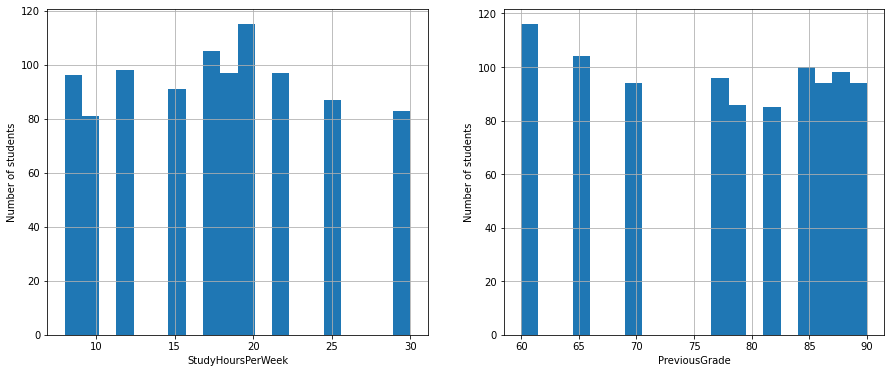

In [6]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.StudyHoursPerWeek.hist(bins=20)
fig.set_ylabel('Number of students')
fig.set_xlabel('StudyHoursPerWeek')

plt.subplot(1, 2, 2)
fig = data.PreviousGrade.hist(bins=20)
fig.set_ylabel('Number of students')
fig.set_xlabel('PreviousGrade')

StudyHoursPerWeek is quite Gaussian and PreviousGrade is skewed, so I will use the Gaussian assumption for StudyHoursPerWeek, and the interquantile range for PreviousGrade.

In [7]:
# find outliers

# StudyHoursPerWeek
Upper_boundary = data.StudyHoursPerWeek.mean() + 3* data.StudyHoursPerWeek.std()
Lower_boundary = data.StudyHoursPerWeek.mean() - 3* data.StudyHoursPerWeek.std()
print('StudyHoursPerWeek outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# PreviousGrade
IQR = data.PreviousGrade.quantile(0.75) - data.PreviousGrade.quantile(0.25)
Lower_fence = data.PreviousGrade.quantile(0.25) - (IQR * 3)
Upper_fence = data.PreviousGrade.quantile(0.75) + (IQR * 3)
print('PreviousGrade outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

StudyHoursPerWeek outliers are values < -1.1858688129055004 or > 36.446921444484445
PreviousGrade outliers are values < 22.0 or > 134.0


### StudyHoursPerWeek

* For StudyHoursPerWeek variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [8]:
# view the statistical summary of StudyHoursPerWeek
data.StudyHoursPerWeek.describe()

count    950.000000
mean      17.630526
std        6.272132
min        8.000000
25%       12.000000
50%       18.000000
75%       22.000000
max       30.000000
Name: StudyHoursPerWeek, dtype: float64

In [9]:
# Assuming normality

Upper_boundary = X_train.StudyHoursPerWeek.mean() + 3* X_train.StudyHoursPerWeek.std()
Upper_boundary

35.66898193690642

In [10]:
# top-coding the StudyHoursPerWeek variable

X_train.loc[X_train.StudyHoursPerWeek>Upper_boundary, 'StudyHoursPerWeek'] = Upper_boundary
X_test.loc[X_test.StudyHoursPerWeek>Upper_boundary, 'StudyHoursPerWeek'] = Upper_boundary

X_train.StudyHoursPerWeek.max(), X_test.StudyHoursPerWeek.max()

(30.0, 30.0)

### PreviousGrade

* The outliers, according to the above plot, lie all at the right side of the distribution. This is, some students had extremely high previous grades. Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding.

In [11]:
# view statistical properties of PreviousGrade

X_train.PreviousGrade.describe()

count    678.000000
mean      77.666667
std        9.894470
min       60.000000
25%       70.000000
50%       78.000000
75%       86.000000
max       90.000000
Name: PreviousGrade, dtype: float64

In [12]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = data.PreviousGrade.quantile(0.75) - data.PreviousGrade.quantile(0.25)

Upper_fence = X_train.PreviousGrade.quantile(0.75) + (IQR * 3)

Upper_fence

134.0

The upper boundary, above which every value is considered an outlier is a grade of the Upper_fence value for the PreviousGrade.

In [13]:
# top-coding: capping the variable PreviousGrade at Upper_fence
X_train.loc[X_train.PreviousGrade>Upper_fence, 'PreviousGrade'] = Upper_fence
X_test.loc[X_test.PreviousGrade>Upper_fence, 'PreviousGrade'] = Upper_fence
X_train.PreviousGrade.max(), X_test.PreviousGrade.max()

(90.0, 90.0)

Thus we deal with outliers from a machine learning perspective.